# Исследование продаж игр интернет-магазина «Стримчик»
___
**Описание исследования**

В нашем распоряжении данные о продажах компьютерных игр до 2016 года в интернет-магазине. Данные содержат информацию о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам необходимо провести исследования для выявления закономерностей успешности игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
___
**Цель исследования**

Провести анализ данных для выявления закономерностей успешности игры, благодаря чему интернет-магазин сможет заранее определить потенциально успешную игру, провести успешную маркетинговую кампанию и, как итог, повысить показатели продаж.
___
**Задачи исследования**

- изучение исходных данных;
- предобработка данных;
- провести исследовательских анализ данных;
- провести статистический анализ данных;
- проверка гипотез;
- общий вывод.
___
**Исходные данные**

Заказчик предоставил нам 1 датасет, в котором собрана необходимая для исследования информация. Исходные данные насчитывают 16715 объектов и 11 признаков.
___
**Данное исследование разделим на несколько частей**

***Часть 1. <a href='#section1'>Изучим общую информации</a>:***
- <a href='#section1.1'>загрузим используемые библиотеки</a>;
- <a href='#section1.2'>загрузим датасет и изучим общую информацию предоставленных данных</a>;
- <a href='#section1.3'>вывод по части №1</a>.

***Часть 2. <a href='#section2'>Предобработка данных</a>:***
- <a href='#section2.1'>приведем наименования столбцов к стилю `snake_case`</a>;
- <a href='#section2.2'>обработаем пропущенные значения</a>;
- <a href='#section2.3'>изменим тип данных столбцов, где необходимо</a>;
- <a href='#section2.4'>сгенерируем дополнительные признаки</a>;
- <a href='#section2.5'>обработаем дубликаты</a>;
- <a href='#section2.6'>вывод по части №2</a>.

***Часть 3. <a href='#section3'>Исследовательский анализ данных (EDA)</a>:***
- <a href='#section3.1'>проанализируем количество игр по годам</a>;
- <a href='#section3.2'>проанализируем суммарные продажи игр для различных платформ</a>;
- <a href='#section3.3'>рассмотрим распределение продаж для топ-10 платформ</a>;
- <a href='#section3.4'>строим распределение продаж для топ-10 платформ за актуальный период (2014-2016 гг.)</a>;
- <a href='#section3.5'>посмотрим как влияют на продажи отзывы пользователей и критиков</a>;
- <a href='#section3.6'>распределение игр по жанрам</a>;
- <a href='#section3.7'>вывод по части №3</a>.

***Часть 4. <a href='#section4'>Составление портрета пользователя</a>:***
- <a href='#section4.1'>определим топ-5 платформ</a>;
- <a href='#section4.2'>определим топ-5 жанров</a>;
- <a href='#section4.3'>влияние ESRB-рейтинга на продажи</a>.

***Часть 5. <a href='#section5'> Проверка гипотез</a>:***
- <a href='#section5.1'>гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковы</a>;
- <a href='#section5.2'>гипотеза: средние пользовательские рейтинги жанров `Action` и `Sports` разные</a>.

***Часть 6. <a href='#section6'>Общий вывод по проекту</a>.***


<a id='section1.1'></a>
#### Загрузим, используемые в проекте, библиотеки:

In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy import stats as st

<a id='section1'></a>
### Изучение общей информации.

<a id='section1.2'></a>
#### Откроем `csv` файл с данными и сохраним датасет в переменную `data`

In [2]:
# серверный путь
pth1 = '/datasets/'
# локальный путь
pth2 = 'D:/dev/data_science/datasets/'

# откроем и сохраним датафрейм в переменную `data`
try:
    if os.path.exists(pth1):
        data = pd.read_csv(pth1+'games.csv')
    elif os.path.exists(pth2):
        data = pd.read_csv(pth2+'games.csv')
except FileNotFoundError:
    print('Path does not exist. Check path')
    
# выведем общую информацию о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Перед нами таблица из 11 столбцов и 16715 строк. Сразу обращаем внимание на то, что названия столбцов нужно привести к стилю `snale_case`. Также видим наличие пропущенных значений в некоторых столбцах. С типами данных, на первый взгляд, есть некоторые проблемы, но наверняка убедимся в этом чуть позже.

Выведем на экран первые 10 строк датасет:

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<a id='section1.3'></a>
### **Вывод по изучению данных**

В таблице `data`:
- 11 столбцов;
- 16715 вхождений (строк);
- в некоторых столбцах имеются пропуски;
- несколько столбцов имеют неверный тип данных;
- каждый столбец не удовлетворяет стилю `snake_case`.

## <a id='section2'></a>Предобработка данных

<a id='section2.1'></a>
### Приведем названия столбцов в соответствие со стилем `snake_case`

In [4]:
# применим к столбцам `data` метод `str.lower()`
data.columns = data.columns.str.lower()
# проверим результат
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Теперь каждый столбец обозван так, как того требует стиль `snake_case`

<a id='section2.2'></a>
### Обработаем пропуски

Перед выполнением последующих преобразований сделаем копию текущего датасета. Все изменения будем производить именно с копией (`df`):

In [5]:
df = data.copy()
df.shape

(16715, 11)

Из общей информации следует, что пропуски имеются во всех столбцах, кроме столбцов с информацией о платформе игры и о продажах.

**Причиной** же возникновения пропусков с большей долей вероятности является ошибка при выгрузке данных с ресурса (данные спарсились не должным образом), либо отсутствие этих данных на самом ресурсе. Игры могут быть экзотичными (малоизвестными), из-за чего информация о них могла попросту не дойти до ресурса. Из числа прочих возможных причин можно упомянуть человеческую невнимательность: при подготовке датасета можно по ошибке "выбросить" часть данных. Маловероятно, но правдоподобно.

Заполнить пропуски не представляется логичным ни в одном из столбцов: заполнение пропущенных значений в столбце `critic_score` средним или медианным значениями лишь исказит данные и никак не поможет в нашем исследовании, ровно как и в столбцах `year_of_release`, `user_score`, `rating`.

Столбец `rating` довольно специфичный, каждой игре огранизация Entertainment Software Rating Board (ESRB) присваивает определенный возрастной рейтинг на основе содержимого игры, поэтому мы не вправе заполнять пропущенные значения (а если и заполним неким значением, то это лишь, опять же, исказит данные).

В `name` и `genre` имеются 2 пропуска, давайте посмотрим на них:

In [6]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Это объекты с годом выпуска 1993 для платформы GEN. Информация о продажах, платформе и годе релиза не даст нам полной картины об успешности игр. С другой стороны, строка 14244 предельно ясно "говорит" о полном провале игры. А вот строка 659 наоборот показывает весьма успешные продажи игры. Вероятно, рейтинг данной игры был не самым плохим. Но с этими двумя строчками кашу сварить не получится, поэтому просто оставим их на обочине исследования (удалим эти строки из датасета), но перед этим посмотрим при помощи метода `shape` размерность всего датафрейма:

In [7]:
df.shape

(16715, 11)

И теперь избавимся от двух строк.

In [8]:
# обновим содержимое датасета, убрав строки без имени
df = df[df['name'].notna()].reset_index(drop=True)
# убедимся, что лишь 2 строки были удалены
df.shape

(16713, 11)

На очереди столбец с годом выпуска игры `year_of_release`. Посмотрим какую долю от общего числа записей составляют записи с пропущенным значением в данном столбце:

In [9]:
df[df['year_of_release'].isna()].shape[0] / df.shape[0]

0.016095255190570215

Пропусков менее 2% от общего числа записей. Посмотрим на описание этих строк при помощи методов `describe()` и `info`.

In [10]:
df[df['year_of_release'].isna()].describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,0.0,269.000000,269.000000,269.000000,269.000000,154.000000
mean,NaN,0.219888,0.090929,0.024907,0.032007,67.584416
std,NaN,0.424907,0.207933,0.090160,0.075546,14.828740
min,NaN,0.000000,0.000000,0.000000,0.000000,22.000000
25%,NaN,0.010000,0.000000,0.000000,0.000000,57.000000
50%,NaN,0.090000,0.020000,0.000000,0.010000,70.000000
75%,NaN,0.240000,0.100000,0.000000,0.030000,78.000000
max,NaN,4.260000,2.360000,0.770000,0.710000,94.000000


In [11]:
df[df['year_of_release'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 183 to 16520
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             269 non-null    object 
 1   platform         269 non-null    object 
 2   year_of_release  0 non-null      float64
 3   genre            269 non-null    object 
 4   na_sales         269 non-null    float64
 5   eu_sales         269 non-null    float64
 6   jp_sales         269 non-null    float64
 7   other_sales      269 non-null    float64
 8   critic_score     154 non-null    float64
 9   user_score       175 non-null    object 
 10  rating           181 non-null    object 
dtypes: float64(6), object(5)
memory usage: 25.2+ KB


У нас имеется 269 объектов с пропущенным годом выпуска. Однако, у этих записей полностью имеются данные о названии, платформе, жанре и продажах. Это важные признаки для исследование, но признаки с рейтингом не менее важны, но у некоторых объектов имеются пропуски в этих столбцах. Заполнить их средним значением - не выход, истинность данных будет нарушена.

В данных с пропущенным годом имеются довольно приличные объекты (относительно продаж и рейтинга). Но заполнить пропуски, не нарушая достоверность, не представляется возможным (разве что в ручную находить каждую игру и вносить значение), поэтому примем решение удалить эти строки из датасета.

Перед удалением вызовем метод `shape` для понимания того, сколько строк в действительности удалено.

In [12]:
df.shape[0]

16713

И наконец, удаляем строки с пропущенным годом. По завершению данной операции вызовем метод `shape` для проверки удаления верного количества строк. Напомню, должно быть удалено 269 строк.

In [13]:
df = df[df['year_of_release'].notna()].reset_index(drop=True)
df.shape[0]

16444

Получилось. Было удалено ровно 269 строк.

Заранее нам стало известно о том, что в столбце `user_score` кроется некое значение `tbd` (to be determined, с англ. "будет определено позднее"). Проверим это:

In [14]:
df[df['user_score'] == 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
516,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
639,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
709,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E


Действительно, такое значение присутствует в `user_score`. А сколько строк с этим значением?

In [15]:
df[df['user_score'] == 'tbd'].shape[0]

2376

Весьма немало... Но такое значение для нас равносильно пропущенному значению.

А есть ли еще нечисловые значения в этом столбце? Проверим:

In [16]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Нет, видим, что кроме `nan` и `tbd` все остальные значения являются положительными числовыми.

Приведем столбец `user_score` к числовому типу данных с помощью метода `pd.to_numeric`, передав параметру `errors` (обработчик ошибок) значение `coerce`. Таким образом, любое значение, которое метод не может привести к числовому значению, автоматически будет меняться на `NaN`.

In [17]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Видим, что `user_score` имеет корректный тип данных.

На очереди столбец `rating`. ESRB-рейтинг показывает к какой категории относится игра: игра для всех (`E`), игра для взрослых (`M`) и так далее. Посмотрим на все уникальные значения в этом столбце:

In [18]:
df['rating'].value_counts(dropna=False)

NaN     6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

6676 игр без рейтинга. Причин, по которой у игр нет рейтинга, несколько. Сам по себе аггрегатор ESRB предоставляет американскую модель оценки игры. Условно, в той же Японии существует своя модель оценки. Согласно информации [статьи](https://dtf.ru/gamedev/122994-kak-poluchit-vozrastnoy-reyting-v-yaponii-opyt-izdatelya-nekki) Entertainment Software Rating Board (ESRB) — выдаёт рейтинги в Америке и Канаде, Мексике. Поэтому этот рейтинг и не может распространяться на японские игры в Японии. Логичной заменой считаю определить все пропуски как игры без рейтинга, или же `No Rating`.

In [19]:
# размерность перед вычислениями
df.shape

(16444, 11)

In [20]:
df.loc[df['rating'].isna(), 'rating'] = 'No Rating'
# размерность после вычислений
df.shape

(16444, 11)

Удостоверимся в замене:

In [21]:
df['rating'].value_counts(dropna=False)

No Rating    6676
E            3921
T            2905
M            1536
E10+         1393
EC              8
K-A             3
RP              1
AO              1
Name: rating, dtype: int64

Все пропущенные значения обработаны и теперь имеем 6676 игр, которые не имеют рейтинга (игры без рейтинга).

Взглянем на актуальное количество пропусков в нашей таблице:

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Дальнейшая замена пропущенных значений (в столбцах `critic_score` и `user_score`) не представляется возможным. Замена медианным значением (или же средним) исказит статистику (распределение). Поэтому оставим эти значения в таком виде и продолжим работу.

**Промежуточный вывод:** нам удалось избавиться от некоторый пропущенных значений в датасете. В столбцах `critic_score`, `user_score` и `rating` таится большое число пропусков, но логичной замены для них нет, поэтому пропущенные значения остаются в нашей датасете.

<a id='section2.3'></a>
### Изменим тип данных в столбцах, где это необходимо

Так как признак `user_score` мы уже привели к корректному типу данных, то осталось изменить тип лишь в столбце `year_of_release`.

In [23]:
df['year_of_release'] = df['year_of_release'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Теперь все признаки имеют корректный тип данных. Исследуем дальше)

<a id='section2.4'></a>
### Запишем суммарные продажи игр в отдельный столбец `total_sales`

In [24]:
# Найдем значения признаков `na_sales`, `eu_sales`,
# `jp_sales`, `other_sales` для каждого объекта и сложим эти значения
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No Rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No Rating,31.38


Как итог, имеем новый признак `total_sales`, где записано общее количество проданных экземпляров для каждой игры.

<a id='section2.5'></a>
### Займемся поиском дубликатов

Для начала разберемся, есть ли в датасете явные дубликаты с помощью метода `duplicated()`, а метод `sum()` поможет найти количество таких строк.

In [25]:
# найдем число строк-дубликатов
df.duplicated().sum()

0

Явные дубликаты отсутствуют. Но что насчет неявных? Самым практичным способом будет поиск по связке название-платформа (`name`-`platform`), так как поиск исключительно по названию выдаст множество строк с одинаковым названием, но, как на известно, игры зачастую выпускаются на несколько платформ одновременно.

In [26]:
df[df.duplicated(subset=['name', 'platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E,2.56
1177,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1574,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
5883,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
11534,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T,0.08
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E,0.01


В таблице присутствует 3 пары строк, которые имеют одинаковое название и одну платформу. 

Начнем с игры `Need for Speed: Most Wanted`: у этих строк действительно одинаковые название и платформы, но год выпуска отличается. При помощи простого поиска в интернете выясняем, что [осенью 2012 года студия Criterion Games выпустила одноименный ремейк](https://ru.wikipedia.org/wiki/Need_for_Speed:_Most_Wanted#%D0%92%D0%BB%D0%B8%D1%8F%D0%BD%D0%B8%D0%B5'), на 2 платформы (ПК и XBOX360). Соответственно, не имеем права как-либо обрабатывать данный неявный дубликат, так как это отдельная игра.

Теперь смотрим на 'Madden NFL 13': в данном случае год выпуска (year_of_release), пользовательский (user_score) и рейтинг критиков (critic_score), а также ESRB-рейтинг (rating) одинаковы. Очень похоже на то, что строка с индексом 15969 является дополнительной строкой к строке с индексом 600 и просто дополняет информацию. Но также нельзя исключать, что строка с индексом 15969 является уже учтенной в строке с индексом 600. Сумма продаж во 2-й строке всего 0.01, не так уж много. Стоит ли вмешиваться и складывать значение продаж этих строк? На самом деле, я не менял бы строку 600 и просто избавился от строки 15969. Но перед этим посмотрим количество строк в датафрейме.

In [27]:
df.shape[0]

16444

Зафиксировали это число и удаляем 1 строку.

In [28]:
df = df.drop(index=15969).reset_index(drop=True)
df.shape[0]

16443

Как видим, ровно одна строка по конкретному индексу исчезла из нашей таблицы. На этом поиск дубликатов можно считать завершенным.

<a id='section2.6'></a>
### Вывод по предобработке данных

Мы провели предобработку данных, было выполнено следующее:
- избавились от пропусков в столбцах `year_of_release`, `name`, `genre`;
- изменили тип данных в столбцах, где это было необходимо;
- добавили в датафрейм новый столбец `total_sales`, куда поместили значение суммы всех столбцов, демонстрирующих количество продаж. Благодаря этому столбцу в дальнейшем исследовательском анализе мы сможем строить графики по распределению продаж, основываясь на общих продажах игры без дополнительных вычислений;
- нашли дубликаты, выяснили их природу и обработали так, как того требует ситуация.

<a id='section3'></a>
## Проведем исследовательский анализ данных

Для начала посмотрим сколько игр выпускалось в разные года.

Построим график количества выпущенных видеоигр в разные годы.

Для того, чтобы построить график количества выпущенных видеоигр по годам необходимо учесть тот факт, что игры зачастую выпускаются одновременно на несколько платформ, но порт на платформу (или же специализированная разработка под платформу) полноценным релизом назвать не получается. Понятием 'title' / '1 игра' будем считать выпуск игры в определенный год без учета его портов на другие платформы. Если кратко: 1 игра = 1 название (другие платформы не учитываем). Если игра вышла эксклюзивно на 1 платформу - тут все просто. Если игра вышла на несколько платформ - берем для графика только первое упоминание игры.

Для этого найдем и уберем дубликаты игр из датафрейма (оставлять будем первое вхождение `keep='first`), используя поиск по связке название-год, результат передадим переменной `unique_games`:

In [29]:
unique_games = df.drop_duplicates(subset=['name', 'year_of_release'], keep='first')
unique_games.shape

(12195, 12)

Видим, что более 4-х тысяч строк были убраны. Проверим еще раз, действительно ли все дубликаты были убраны.

In [30]:
unique_games[unique_games.duplicated(subset=['name', 'year_of_release'])].shape[0]

0

Да, дубликатов более нет. Теперь можем строить график выпущенных игр по годам.
<a id='section3.1'></a>

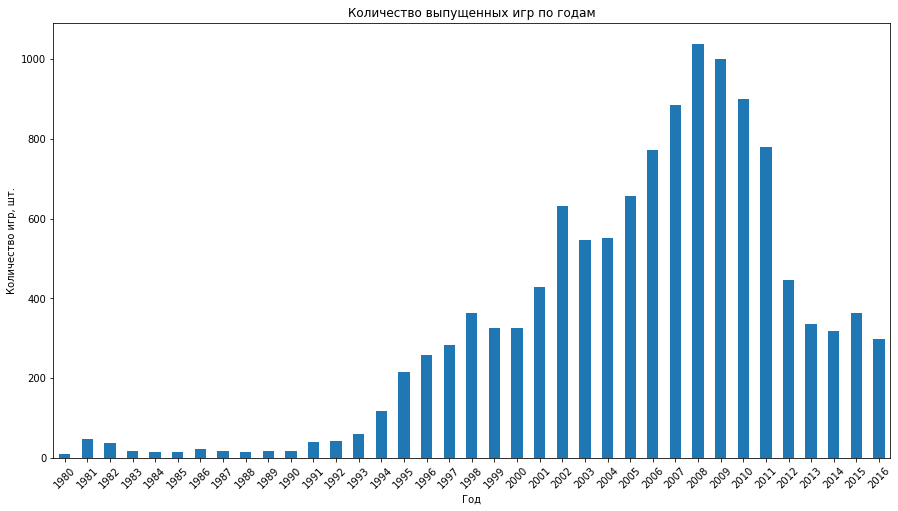

In [31]:
unique_games.groupby('year_of_release')['name'].count().plot(
    kind='bar',
    figsize=(15, 8),
    rot=45,
    title='Количество выпущенных игр по годам',
    xlabel='Год',
    ylabel='Количество игр, шт.'
);

Видим по графику, что данные содержат игры, выпущенные с 1980 года по 2016 год. Планку в 200 выпущенных игр превысили в 1995 году, что совпадает с датой выхода PlayStation 1 (декабрь 1994 года). С 2004 года в индустрии наблюдалось ежегодное увеличение выпущенных игр, вплоть до 2008 года, который и является рекордсменом (более 1000 игр за год). Далее следует падение, вероятно, виной этому стал кризис 2008 года. Всё это повлияло на дальнейшую индустрию, как мы видим самый настоящий кризис пришелся на период 2011-2012 гг. В целом, по количеству выпущенных игр индустрия устоялась на уровне 2013 года (когда по некоторым данным большинство стран смогли справиться с фазами кризиса 2008 года).

Посмотрим на распределение продаж по платформам:
<a id='section3.2'></a>

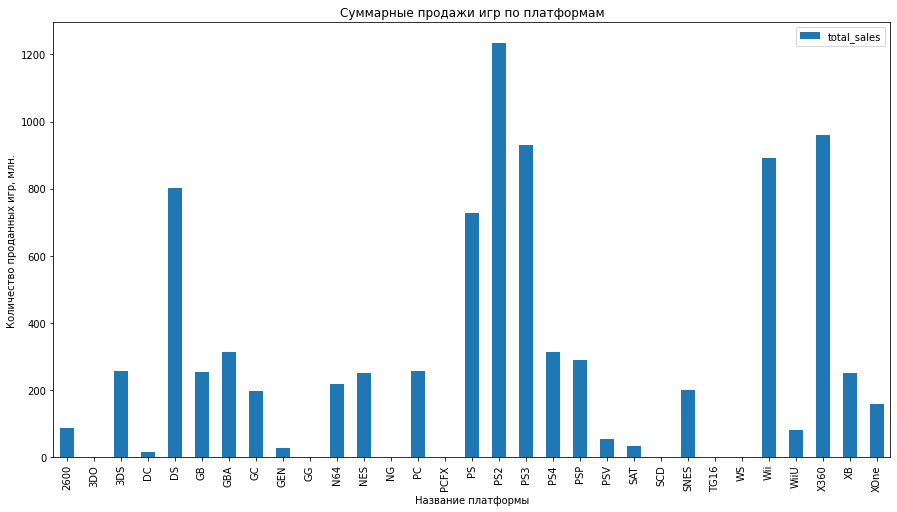

In [32]:
df[['total_sales'] + ['platform']].groupby('platform').sum().plot(
    kind='bar', 
    figsize=(15, 8),
    title='Суммарные продажи игр по платформам',
    xlabel='Название платформы',
    ylabel='Количество проданных игр, млн.'
);

Видим, что безоговорочным лидером среди платформ является `PS2`, следом идет `X360` и далее `PS3` с `Wii`. Лидер в лице `PS2` вполне объясним тем, что количество выпускаемых игр было на пике как раз в те годы, когда платформа `PS2` была актуальна на рынке.

Есть 7 платформ (обойдемся без перечисления), у которых "bar" вовсе отсутствует на графике. 

Теперь отобразим распределение продаж по годам, относительно 10 самых успешных платформ. Для этого определим переменную `top_10`, которой передадим таблицу, состоящую из столбцов `total_sales` и `platform`, после чего сгруппируем полученную таблицу по столбцу `platform`, а к `total_sales` применим метод `sum()` для отображения общей суммы продаж по каждой платформе. И наконец, для отображения 10 лучших платформ отсортируем `top_10` по столбцу `total_sales` (по умолчанию сортировка по возрастанию) и возьмем последние 10 индексов.

In [33]:
top_10 = df[['total_sales'] + ['platform']].groupby('platform').sum().sort_values(by='total_sales')[-10:]
top_10.index

Index(['3DS', 'PSP', 'GBA', 'PS4', 'PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2'], dtype='object', name='platform')

Следующим шагом будет определение переменной `platform_sales`, которой передадим сводную таблицу от `df`: индексами будут годы выпусков `year_of_release`, столбцами - наименования платформ `platform`, сводным значением - суммарное значение продаж `total_sales`:

In [34]:
platform_sales = df.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
)
platform_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 1980 to 2016
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2600    10 non-null     float64
 1   3DO     2 non-null      float64
 2   3DS     6 non-null      float64
 3   DC      7 non-null      float64
 4   DS      11 non-null     float64
 5   GB      13 non-null     float64
 6   GBA     8 non-null      float64
 7   GC      7 non-null      float64
 8   GEN     5 non-null      float64
 9   GG      1 non-null      float64
 10  N64     7 non-null      float64
 11  NES     12 non-null     float64
 12  NG      4 non-null      float64
 13  PC      26 non-null     float64
 14  PCFX    1 non-null      float64
 15  PS      10 non-null     float64
 16  PS2     12 non-null     float64
 17  PS3     11 non-null     float64
 18  PS4     4 non-null      float64
 19  PSP     12 non-null     float64
 20  PSV     6 non-null      float64
 21  SAT     6 non-null      float64
 22 

И теперь для сводной таблицы `platform_sales` в качестве столбцов оставим только столбцы из `top_10`:
<a id='section3.3'></a>

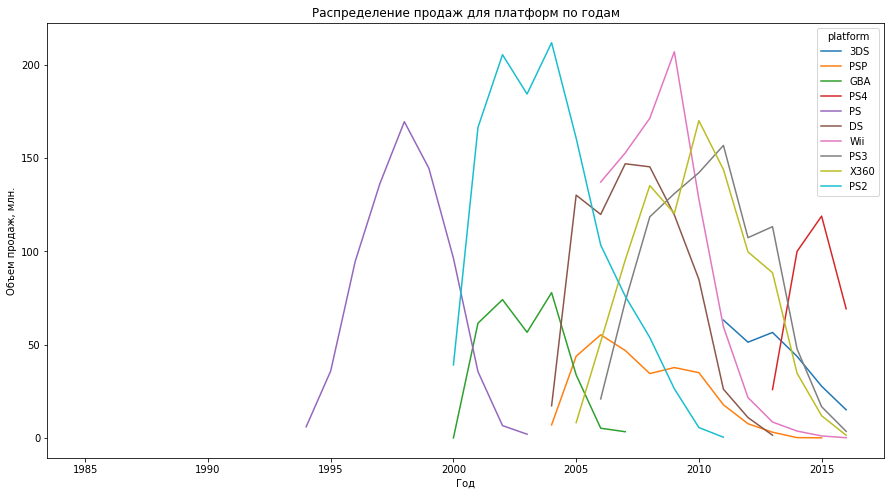

In [35]:
# оставим только значения из `top_10`
platform_sales = platform_sales[[col for col in top_10.index]]
# строим график
platform_sales.plot(
    figsize=(15,8),
    title='Распределение продаж для платформ по годам',
    xlabel='Год',
    ylabel='Объем продаж, млн.'
);

Судя по графику выше, цикл жизни успешной платформы находится в пределах от 5 до 10 лет. После, к ним на замену приходят платформы следующего поколения. Так, `PS2` была крайне популярна с самого своего появления (2000), после пика в 2004 году популярность (или же скорее её актуальность) начала угасать и недождавшись полного отказа рынка от данной платформы разработчики выпускают замену в виде `PS3` в конце 2006 года.

Игровая индустрия - вещь стремительная, которая следуя мировому прогрессу лишь набирает темпы и обороты (будь то выпуск игр, увеличение аудитории, а также выпуск консолей новых поколений). Пожалуй, исключительно глобальный катаклизм и мировой финансовый кризисы способны этому помешать. Так или иначе, производители не дожидаются полной деактуализации своих платформ и стараются сделать смену поколений наиболее сглаженной, не доводя объем выручки (объем продаж) до критичного значения.

В связи с вышеизложенным, определим **актуальный период** с 2014 года по 2016.

Так, оставим в нашей таблице данные исключительно за этот временной промежуток:

In [36]:
data_after2014 = df[df['year_of_release'] >= 2014]
data_after2014.shape[0]

1689

В итоге, за актуальный период имеем 1689 записей.

Посмотрим как теперь распологаются общие продажи по каждой платформе:
<a id='section3.4'></a>

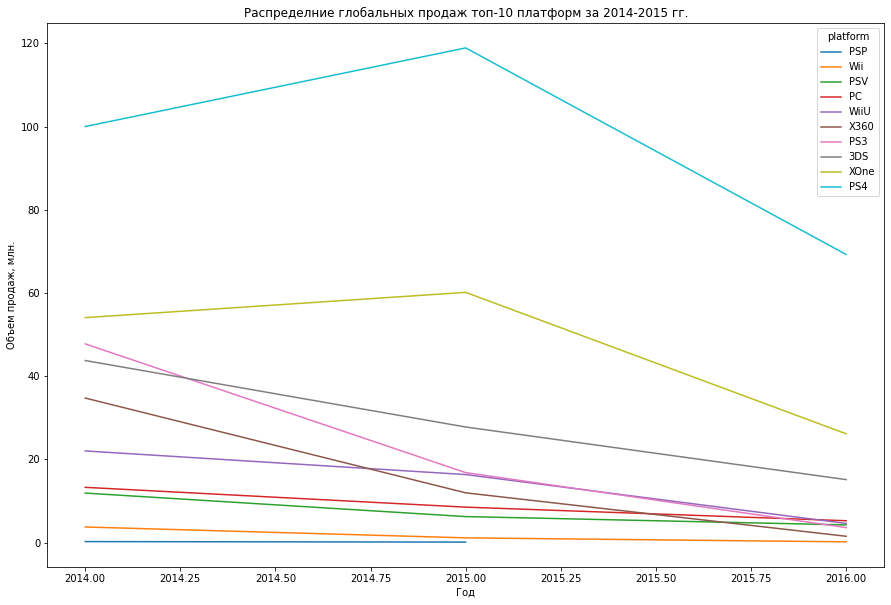

In [37]:
# определим топ-10 платформ по общим продажам
sample_top_10 = data_after2014[['total_sales'] + ['platform']].groupby('platform').sum().sort_values(by='total_sales')[-10:]
# делаем сводную таблицу
plat_sales_after2014 = data_after2014.pivot_table(
    index='year_of_release', columns='platform',
    values='total_sales', aggfunc='sum'
)
# оставим в сводной таб. данные о топ-10 платформах
plat_sales_after2014 = plat_sales_after2014[[col for col in sample_top_10.index]]
# строим график
plat_sales_after2014.plot(
    figsize=(15,10),
    title='Распределние глобальных продаж топ-10 платформ за 2014-2015 гг.',
    xlabel='Год',
    ylabel='Объем продаж, млн.'
);

По этому графику с уверенностью можем определить лидирующую актуальную платформу - `PS4`. На момент конца 2015 года растущей тенденцией обладает и `PS4` и `XOne`, но видим, что прирост объема продаж за 1 год (с 2014 по 2015) у `PS4` несколько больше, чем у `XOne` . Определим актуальные платформы - это `PS4`, `XONE`, `PC` и `3DS`.

Лидерами продаж однозначно назовем `PS4`, `XONE` и `3DS`. Соответственно, вся перспектива потенциала прибыли ложится на плечи этих 'гигантов' индустрии.

Построим boxplot ("ящик с усами") для глобальных продаж, разбитый по платформам:

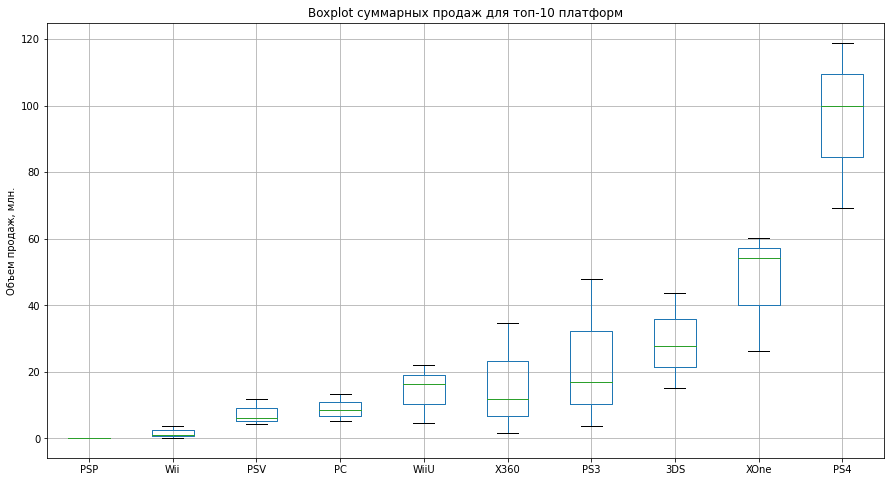

In [38]:
plat_sales_after2014.boxplot(figsize=(15,8))
plt.ylabel('Объем продаж, млн.')
plt.title('Boxplot суммарных продаж для топ-10 платформ');

Первое, что бросается в глаза - отсутствие выбросов у платформ. У `PS4` наблюдается наиболее размашистое распределение продаж, с медианой в районе 100 млн. продаж. Самая большая медиана также у платформы `PS4` (~100 млн.). Рассмотрим боксплот с `PS4` подробнее. Продажи 25% наиболее популярных игр расположены в диапазоне от ~110 млн. до ~ 119 млн. - шикарный результат для этого периода! Наименее популярные игры (1-й квартиль) расположены в границах от 70 до ~83 млн. Ни одна из платформ не может продемонстрировать результат, хотя бы близко похожий на этот.

У `XOne` ситуация лучше, чем у остальных платформ (за исключением `PS4`, разумеется). Медиана ~53-54 млн., 4-й квартиль расположен весьма кучно.

Посмотрим как влияют на продажи отзывы пользователей и критиков внутри неактуальной, но популярной платформы `PS3`. Построим диаграммы рассеяния:
<a id='section3.5'></a>

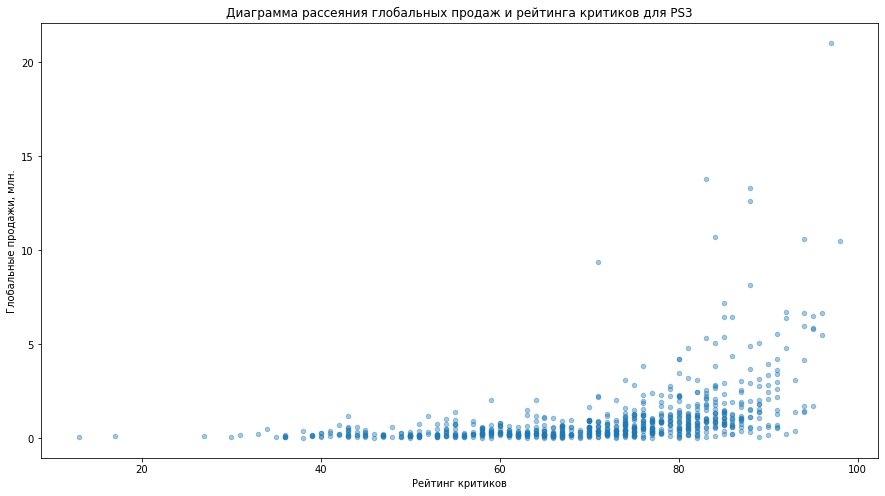

In [39]:
# Построим диаграмму рассеяния `total_sales` и `critic_score` для платформы `PS3`
df[df['platform'] == 'PS3'].plot(
    x = 'critic_score',
    y = 'total_sales',
    figsize = (15, 8),
    alpha = 0.4,
    kind = 'scatter',
    title = 'Диаграмма рассеяния глобальных продаж и рейтинга критиков для PS3',
    xlabel = 'Рейтинг критиков',
    ylabel = 'Глобальные продажи, млн.'
);

Видим, что игры с рейтингом, приближенным к 100 имеют более высокие продажи, по сравнению с играми, чей рейтинг меньше, но такая тенденция соблюдается не всегда. Иными словами, чем больше рейтинг игры, тем больше вероятность выброса.

С помощью метода `corr()` определим значение корреляции `total_sales` от `critic_score`:

In [40]:
df.loc[df['platform'] == 'PS3', 'total_sales'].corr(
    df.loc[df['platform'] == 'PS3', 'critic_score']
)

0.43371246722331125

Корреляция в 0.43 говорит о слабой связи, но не о её отсутствии. Увеличение рейтинга от критика приводит к увеличенным продажам, но далеко не всегда.

**На очереди признак `user_score`**. Строим диаграмму рассеяния:

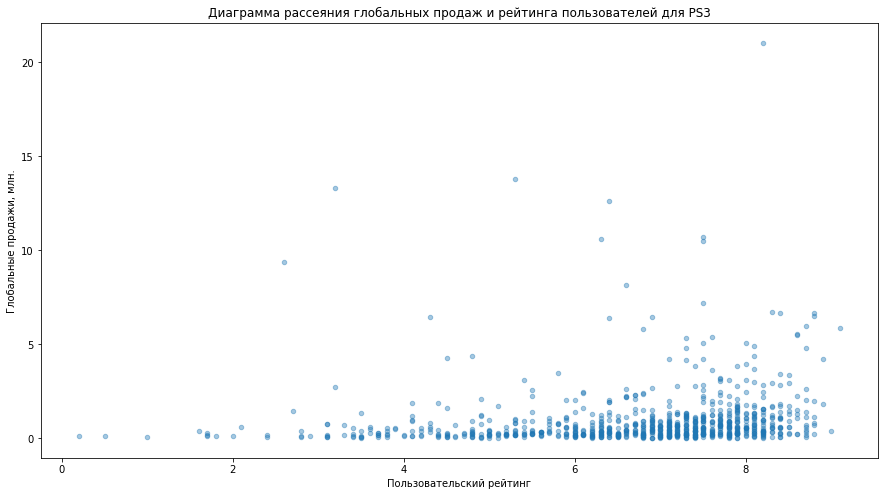

In [41]:
df[df['platform'] == 'PS3'].plot(
    x = 'user_score',
    y = 'total_sales',
    figsize = (15, 8),
    alpha = 0.4,
    kind = 'scatter',
    title = 'Диаграмма рассеяния глобальных продаж и рейтинга пользователей для PS3',
    xlabel = 'Пользовательский рейтинг',
    ylabel = 'Глобальные продажи, млн.'
);

Ситуация несколько схожа с диаграммой рассеяния продаж и рейтинга критиков, но с оговоркой. На этой диаграмме видим больше выбросов, которые никак не зависят от рейтинга. Так, например, игра с пользовательским рейтинг чуть ниже 3 имеет продажи в несколько раз больше, чем большинство игр с рейтинг 8 и большей.

Предположим, что значение корреляции меньше, чем с критиками, но стоит в этом убедиться:

In [42]:
df.loc[df['platform'] == 'PS3', 'total_sales'].corr(
    df.loc[df['platform'] == 'PS3', 'user_score']
)

0.12792603540158226

Корреляция в 0.128 говорит о крайне слабой связи. Это говорит нам о том, что высокий пользовательский рейтинг не гарантирует высокие продажи. Но при этом бОльшие показатели продаж у игр с высоким пользовательским рейтингом. **Как итог**: большая оценка от аудитории - не панацея от низких продаж.

Но может такая ситуация сохраняется исключительно в отношении `PS3`? Давайте проверим коэффициент корреляции этих же признаков но для других платформ.

**Возьмем 'вечную' платформу `PC`**. Построим диаграму рассеяния продаж и рейтинга критиков:

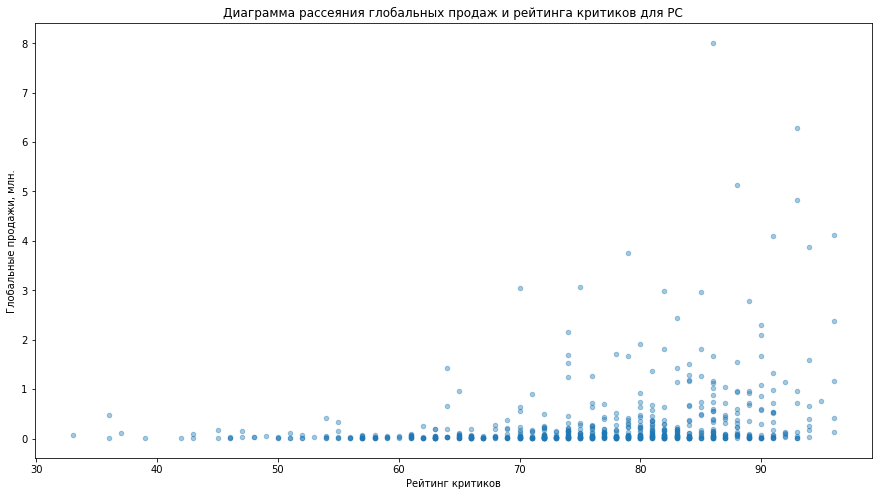

In [43]:
df[df['platform'] == 'PC'].plot(
    x = 'critic_score',
    y = 'total_sales',
    figsize = (15, 8),
    alpha = 0.4,
    kind = 'scatter',
    title = 'Диаграмма рассеяния глобальных продаж и рейтинга критиков для PC',
    xlabel = 'Рейтинг критиков',
    ylabel = 'Глобальные продажи, млн.'
);

В целом, выбросов больше, чем для подобной выборки но для `PS3`, но тенденция схожа: показатель продаж (а также количество выбросов) тем больше, чем больше рейтинг критиков.

Рассчитаем коэффициент корреляции:

In [44]:
df.loc[df['platform'] == 'PC', 'total_sales'].corr(
    df.loc[df['platform'] == 'PC', 'critic_score']
)

0.25739471840098505

Результат показывает более слабую связь, чем в случае с `PS3`.

А что на счет пользовательского рейтинга? Строим диаграмму рассеяния

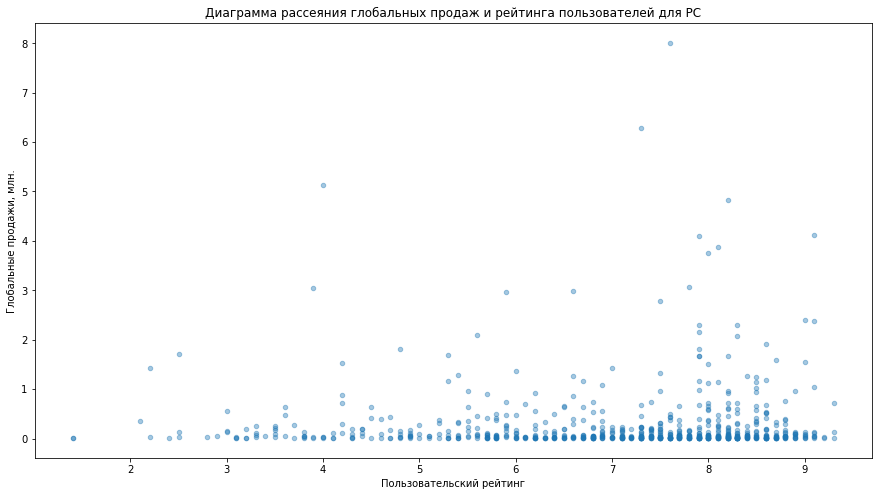

In [45]:
df[df['platform'] == 'PC'].plot(
    x = 'user_score',
    y = 'total_sales',
    figsize = (15, 8),
    alpha = 0.4,
    kind = 'scatter',
    title = 'Диаграмма рассеяния глобальных продаж и рейтинга пользователей для PC',
    xlabel = 'Пользовательский рейтинг',
    ylabel = 'Глобальные продажи, млн.'
);

Также, как и с диаграммой рассеяния пользовательского рейтинга для `PS3`, диаграмма для `PC` показывает отсутствие сильной линейной зависимости от пользовательского рейтинга. Выбросы имеются практически для любого рейтинга.

Считаем коэффициент корреляции

In [46]:
df.loc[df['platform'] == 'PC', 'total_sales'].corr(
    df.loc[df['platform'] == 'PC', 'user_score']
)

0.012904741611451175

Тут ситуация схожа с платформой `PS3`, но всё еще очень неубедительно, линейная зависимость практически отсутствует.

**Рассмотрим `XOne`**. Строим диаграмму рассеяния глобальных продаж и рейтинга критиков:

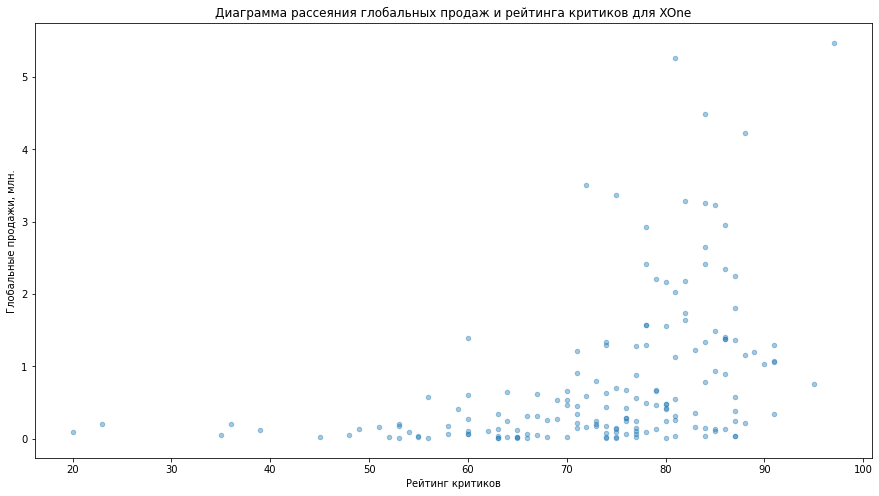

In [47]:
df[df['platform'] == 'XOne'].plot(
    x = 'critic_score',
    y = 'total_sales',
    figsize = (15, 8),
    alpha = 0.4,
    kind = 'scatter',
    title = 'Диаграмма рассеяния глобальных продаж и рейтинга критиков для XOne',
    xlabel = 'Рейтинг критиков',
    ylabel = 'Глобальные продажи, млн.'
);

Рассеяние в данном примере несколько кучнее при высоком рейтинге. Однако, для `XOne` высокий рейтинг это в бОльшей мере означает необычайно высокие продажи, чем для `PC`.

Считаем коэффициент корреляции

In [48]:
df.loc[df['platform'] == 'XOne', 'total_sales'].corr(
    df.loc[df['platform'] == 'XOne', 'critic_score']
)

0.41699832800840175

0.417 - коэффициент схож с результатами `PS3`. Но все ещё далеко от линейной зависимости.

Строим диаграмму рассеяния для пользовательского рейтинга:

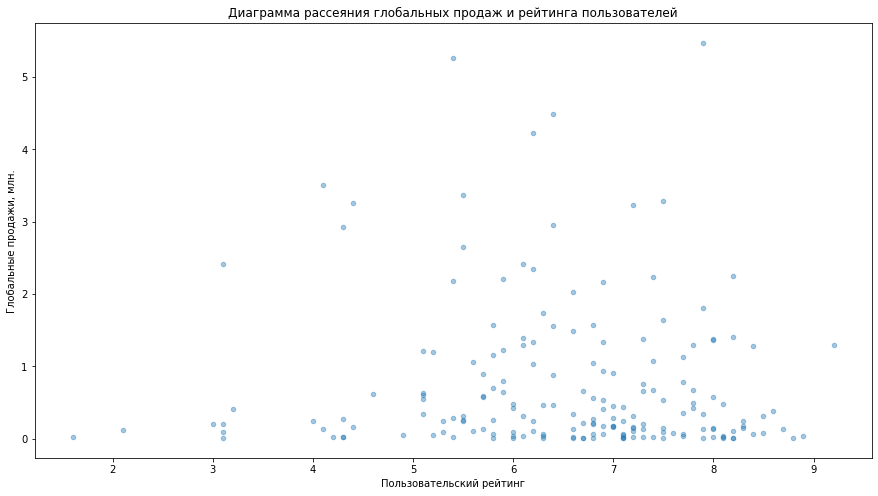

In [49]:
df[df['platform'] == 'XOne'].plot(
    x = 'user_score',
    y = 'total_sales',
    figsize = (15, 8),
    alpha = 0.4,
    kind = 'scatter',
    title = 'Диаграмма рассеяния глобальных продаж и рейтинга пользователей',
    xlabel = 'Пользовательский рейтинг',
    ylabel = 'Глобальные продажи, млн.'
);

Коэффициент корреляции можно было бы и не считать, уже прекрасно виден весь хаос, который имеется в данных и ни о какой линейной зависимости говорить не стоит, но всё равно рассчитаем значение:

In [50]:
df.loc[df['platform'] == 'PC', 'total_sales'].corr(
    df.loc[df['platform'] == 'PC', 'user_score']
)

0.012904741611451175

Всё так. Даже тут, линейной зависимостью и не пахнет.

Как итог, имеем понимание того, что рейтинг (будь то пользовательский рейтинг или оценка критика) не является однозначным средством для роста продаж игры.

С другими платформами ситуация, вероятно, складывается похожим образом, где-то уровень корреляции будет чуть больше, где-то чуть меньше, но, повторюсь, линейной зависимости продаж от рейтингов нет. Соответственно, плохой пользовательский рейтинг игры это еще далеко не приговор, как показывают наши данные, даже с рейтингом 3 можно получить шикарные продажи игры.

Посмотрим на общее распределение игр по жанрам в актуальный период, но для этого избавимся от дубликатов (как в случае с графиком общего числа выпущенных игр по годам). И тут нам поможет датафрейм `unique_games`. Просто оставим данные за 2014 год и позднее построим график распределения игр по жанрам:
<a id='section3.6'></a>

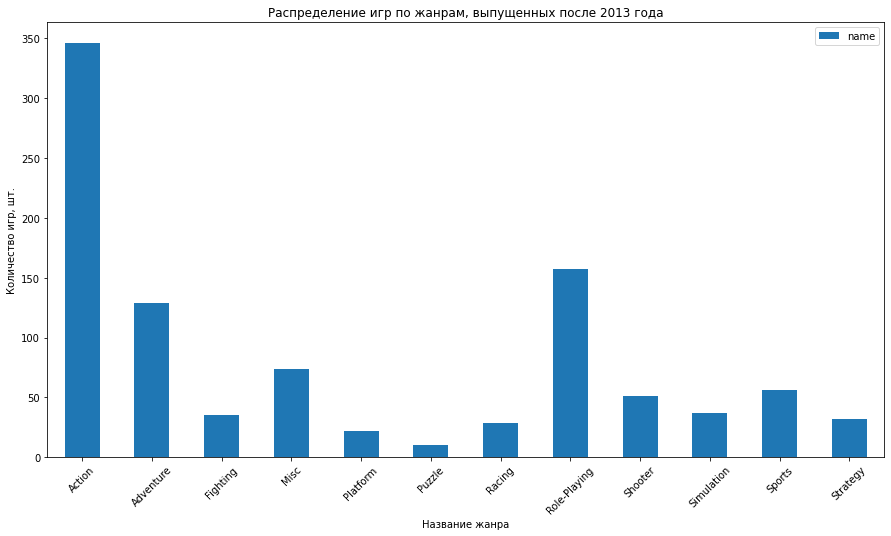

In [51]:
# оставим данные за актуальные период
data_after2014_unique = unique_games[unique_games['year_of_release'] >= 2014]
# строим график
data_after2014_unique[['name'] + ['genre']].groupby('genre').count().plot(
    kind = 'bar',
    figsize = (15, 8),
    rot = 45,
    title = 'Распределение игр по жанрам, выпущенных после 2013 года',
    xlabel = 'Название жанра',
    ylabel = 'Количество игр, шт.'
);

Игр жанра `Action` в **актуальный период** выпущено чуть менее 350. Это безусловный лидер среди жанров, 2 место занимают ролевые (`Role-Playing`) игры, 3 место досталось приключенческим играм (`Adventure`), игры жанров `Misc` (другое) и `Sports` замыкают топ-5 жанров.

Для того, чтобы оценить прибыльность жанра необходимо взглянуть на распределение продаж игр, учитывая медианное (или среднее) значение количества проданных копий. Общее число продаж не скажет нам о прибыльности (очевидно, что если выпущено 350 игр в жанре экшн, то и продаж у этих игр должно быть больше, по сравнению с 50 играми жанра `Shooter`). Таким образом мы получим портрет "типичной" игры для каждого жанра:

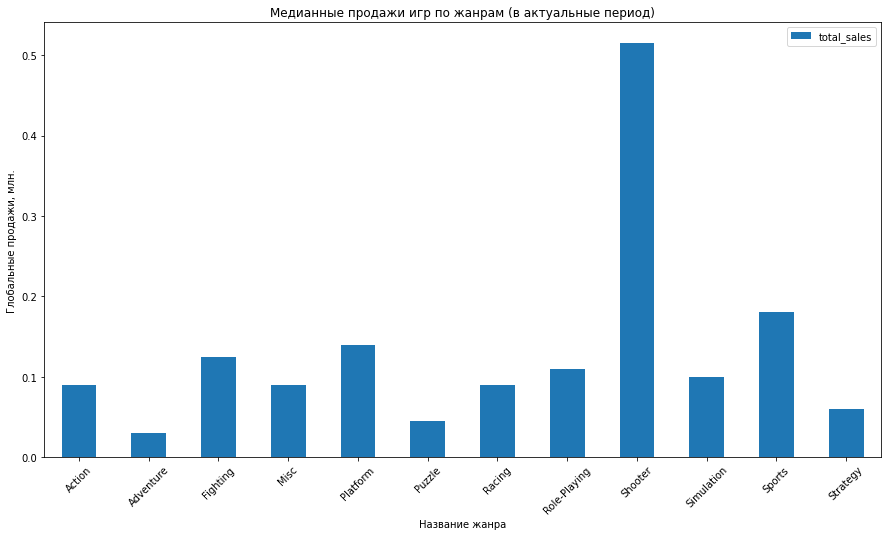

In [52]:
data_after2014[['genre'] + ['total_sales']].groupby('genre').median().plot(
    kind='bar',
    figsize = (15, 8),
    rot = 45,
    title='Медианные продажи игр по жанрам (в актуальные период)',
    xlabel='Название жанра',
    ylabel='Глобальные продажи, млн.'
);

У нас имеется безоговорочный лидер в актуальный период - игры жанра `Shooter`.

Заодно посмотрим эту же информацию в виде сгруппированной таблицы, чтобы увидеть целочисленные значения.

In [53]:
data_after2014[['genre'] + ['total_sales']].groupby('genre').median().sort_values(by='total_sales')

,total_sales
genre,
Adventure,0.030
Puzzle,0.045
Strategy,0.060
Action,0.090
Misc,0.090
Racing,0.090
Simulation,0.100
Role-Playing,0.110
Fighting,0.125


Видим, что `Action` даже не в топ-5 по прибыльности по медианному значению. Самым прибыльным по данному критерию является жанр `Shooter`, игры жанра (`Sports`) на второй позиции. Платформеры (`Platform`) в тройке. Файтинги (`Fighting`) и ролевые игры (`Role-Playing`) расположились на 4 и 5 местах, соответственно. И лишь на 7-м месте расположись игры жанра `Action`.

А вот приключения (`Adventure`) анти-лидеры по прибыльности. Стратегии (`Strategy`) и головоломки (`Puzzle`) имеют чуть лучшее положение, но до "топов" далеко.

Безусловно, нельзя судить о прибыльности игры, не зная сколько компания-разработчик вложила средств для создания продукта. Данная метрика показывает скорее предпочтения пользователей.

**Краткий вывод:** в процессе исследовательского анализа данных смогли определить средний цикл жизни платформы (5-10 лет), благодаря этому определили актуальный период (2014-2016 гг.), по которому вели дальнейшее исследование. Установили актуальные платформы, которые обладают потенциалом на несколько последующих лет. Установили уровень корреляции количества глобальных продаж от рейтинга (пользователей и критиков) - **линейная зависимость не обнаружена**. Финальным шагом в исследовательском анализе определили наиболее прибыльные жанры: `Shooter` (шутеры), `Sports` (спортивные симуляторы) и `Platform` (платформеры).
<a id='section3.7'></a>

<a id='section4'></a>
## Составим портреты пользователей для каждого из регионов (NA, EU, JP)

### Определим самые популярные платформы (топ-5)
<a id='section4.1'></a>

In [54]:
regions = {'na_sales': 'Северная Америка', 'eu_sales': 'Европа', 'jp_sales': 'Япония'}

for reg, name_reg in regions.items():
    print(f'Топ-5 популярных платформ для региона {name_reg}:')
    display(data[[reg] + ['platform']].groupby('platform').sum().sort_values(by=reg, ascending=False)[:5])
    print()

Топ-5 популярных платформ для региона Северная Америка:


,na_sales
platform,
X360,602.47
PS2,583.84
Wii,496.90
PS3,393.49
DS,382.40



Топ-5 популярных платформ для региона Европа:


,eu_sales
platform,
PS2,339.29
PS3,330.29
X360,270.76
Wii,262.21
PS,213.61



Топ-5 популярных платформ для региона Япония:


,jp_sales
platform,
DS,175.57
PS,139.82
PS2,139.20
SNES,116.55
3DS,100.67


Северная Америка `NA`:
- Начнем с того, что рынок продаж видеоигр в Северной Америке поистине огромен;
- `NA` имеет (имел) ярко выраженное пристрастие к играм на платформе `X360`;
- `Wii` - вторая по популярности; `PS3` - третья платформа по популярности.

Европа `EU`:
- лидирующую позицию занимает `PS3`, следом идет `X360`;
- `EU` единственный регион, в топ-5 которого входят продажи игр для `PS4`.

Япония `JP`:
- сам по себе объем продаж невелик;
- в топ-5 вошли 3 карманные платформы (`DS`, `3DS`, `PSP`). Японцы ценят портативность или предпочитают играть в любом месте?

### Определим самые популярные жанры (топ-5)
<a id='section4.2'></a>

In [55]:
for reg, name_reg in regions.items():
    print(f'Топ-5 популярных жанров для региона {name_reg}:')
    display(data[[reg] + ['genre']].groupby('genre').sum().sort_values(by=reg, ascending=False)[:5])
    print()

Топ-5 популярных жанров для региона Северная Америка:


,na_sales
genre,
Action,879.01
Sports,684.43
Shooter,592.24
Platform,445.50
Misc,407.27



Топ-5 популярных жанров для региона Европа:


,eu_sales
genre,
Action,519.13
Sports,376.79
Shooter,317.34
Racing,236.51
Misc,212.74



Топ-5 популярных жанров для региона Япония:


,jp_sales
genre,
Role-Playing,355.41
Action,161.43
Sports,135.54
Platform,130.83
Misc,108.11


В Европе и Северной Америке топ-4 жанров идентичны, можно сказать о схожести вкусов или же об идентичных рекламных кампаниях.

Иначе обстоят дела в регионе Япония. Топ-5 выглядит обособленно от двух других. Так, пользователи отдают предпочтение ролевым играм (`Role-Playing`). Иная культура - иные предпочтения.

### Влияет ли рейтинг ESRB на продажи в регионах?
<a id='section4.3'></a>

In [56]:
for reg, name_reg in regions.items():
    print(f'Топ-5 продаж относительно ESRB-рейтинга в регионе {name_reg}:')
    display(data[[reg] + ['rating']].groupby('rating').sum().sort_values(by=reg, ascending=False))
    print()

Топ-5 продаж относительно ESRB-рейтинга в регионе Северная Америка:


,na_sales
rating,
E,1292.99
T,759.75
M,748.48
E10+,353.32
K-A,2.56
EC,1.53
AO,1.26
RP,0.00



Топ-5 продаж относительно ESRB-рейтинга в регионе Европа:


,eu_sales
rating,
E,710.25
M,483.97
T,427.03
E10+,188.52
AO,0.61
K-A,0.27
EC,0.11
RP,0.08



Топ-5 продаж относительно ESRB-рейтинга в регионе Япония:


,jp_sales
rating,
E,198.11
T,151.40
M,64.24
E10+,40.20
K-A,1.46
AO,0.00
EC,0.00
RP,0.00


Как видим, ситуация в Европе и Северной Америке схожая. Игры 3-х категорий словно определили индустрию: `E` (для всех), `M` (для взрослых) и `T` (для подростков) захватили бОльшую часть рынка. Игры без рейтинга заняли в обоих регионах вторые позиции.

В Японии же картина несколько отличается. Игры без ESRB-рейтинга здесь как горячие пирожки. Но в чем же дело? Вероятно, всему виной тот факт, что ESRB — выдаёт рейтинги в Америке и Канаде, Мексике. А в Японии имеется своё агенство CERO (Computer Entertainment Rating Organization). Соответственно, это не означает, что японцы покупают игры, совсем уж не имеющих возрастной рейтинг, просто напросто эти игры не имеют ESRB-рейтинг, но скорее всего имеют свой местный CERO-рейтинг. В остальном же, игры с ESRB-рейтингом `M` (для взрослых) не пользуются спросом и занимают лишь 4-ю строчку в топе. Игры для всех (`E`) и для подростков (`T`) пользуются гораздо большим спросом.

<a id='section5'></a>
## Проверим гипотезы
<a id='section5.1'> </a>
### Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковы
- H_0: пользовательские рейтинги (`user_score`) платформы Xbox One (`XOne`) = пользовательские рейтинги (`user_score`) платформы `PC`
- H_1: пользовательские рейтинги (`user_score`) платформы Xbox One (`XOne`) ≠ пользовательские рейтинги (`user_score`) платформы `PC`
- aplha = 0.05

In [57]:
# В sample передадим те строки, у которых значение столбца `user_score` != пропущенному значению nan
sample = df[df['user_score'].notna()]

results = st.ttest_ind(
    sample[sample['platform'] == 'XOne']['user_score'],
    sample[sample['platform'] == 'PC']['user_score'],
    equal_var=False
)

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

4.5385802963771835e-06
Отвергаем нулевую гипотезу


При проверке этой гипотезы использовали t-критерий Стьюдента (независимые выборки). Данные выборки являются независимыми, поскольку вероятность отбора любого испытуемого одной выборки не зависит от отбора любого из испытуемых другой выборки.

`pvalue` равняется 0.000004, что означает: вероятность получить такой результат, при условии, что `H_0` верна = **0.0004%**

У нас нет оснований утверждать, что средние пользовательские рейтинги двух платформ равны.

Соответственно, отвергаем нулевую гипотезу (`H_0`) и принимаем альтернативную гипотезу (`H_1`): средние пользовательские рейтинги платформ Xbox One и PC **неравны**.

<a id='section5.2'></a>
### Проверка гипотезы: средние пользовательские рейтинги жанров `Action` (англ. «действие», экшен-игры) и `Sports` (англ. «спортивные соревнования») разные.

- H_0: пользовательские рейтинги (`user_score`) жанра `Action` = пользовательские рейтинги (`user_score`) жанра `Sports`
- H_1: пользовательские рейтинги (`user_score`) жанра `Action` ≠ пользовательские рейтинги (`user_score`) жанра `Sports`
- alpha = 0.05

In [58]:
results = st.ttest_ind(
    sample[sample['genre'] == 'Action']['user_score'],
    sample[sample['genre'] == 'Sports']['user_score'],
    equal_var=False
)

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.07751671595536253
Не получилось отвергнуть нулевую гипотезу


При проверке этой гипотезы использовали также t-критерий Стьюдента. Данные выборки являются независимыми, поскольку вероятность отбора любого испытуемого одной выборки не зависит от отбора любого из испытуемых другой выборки.

`pvalue` оказалось равным 7.7%, что означает: получить такой результат, при условии, что H_0 верна = 7.7%

Таким образом, выбрав порог в 5%, мы не может отвергнуть нулевую (`H_0`) гипотезу: у нас нет оснований говорить, что различие двух рейтингов **значимо**.

<a id='section6'></a>
## Общий вывод 

В данном проекте выполнили предобработку данных, провели исследовательский анализ данных, составили портреты пользователей для каждого региона, а также проверили пару гипотез.

А теперь подробнее. Цель проекта состоит в том, чтобы определить закономерности, которые позволяют определить потенциально успешное направление в индустрии видеоигр.

Для начала мы провели предобработку данных, в ходе которой в некоторрых столбцах удалось избавиться от пропусков (`name`, `year_of_release`, `rating`), в столбцах с пользовательской оценкой (`user_score`) и оценкой критиков (`critic_score`) пропуски оставили. По той простой причине, что логичной замены предусмотреть не удалось.

По ходу исследовательского анализа смогли определить средний цикл жизни платформы (5-10 лет), но сменяемость платформ новыми поколениями происходит гораздо быстрее. Благодаря этому определили актуальный период (3 года), по которому вели дальнейшее исследование. Установили актуальные платформы, которые обладают потенциалом на несколько последующих лет (`PS4`, `XOne`, `3DS`, `PC`). Установили уровень корреляции количества глобальных продаж от рейтинга (пользователей и критиков) - **линейная зависимость не обнаружена**. Финальным шагом в исследовательском анализе определили наиболее прибыльные жанры (`Shooter`, `Sports`, `Platform`).

При составлении портретов была замечена схожесть североамериканских пользователей с европейскими: в большинстве своем пользователи предпочитают похожие жанры и платформы (за исключением искренней любви североамериканцев к `X360`) . Тогда как пользователи из Японии обладают своим вкусом, не так сильно похожим на европейских или североамериканских пользователей: топ-5 жанров и топ-5 платформ кардинально отличаются от других регионов. В целом, ситуация с рейтингом ESRB однородна в регионах `NA` и `EU`, но в Японии дела обстоят совсем иначе. Именно игры без ESRB-рейтинга возглавляют топ-продаж. А всему причиной, как мы выяснили, то, что в Японии функционирует совсем иная организация, предоставляющая возрастной рейтинг для игр. Поэтому формально японцы скупают игры без ESRB-рейтинга, но скорее всего со своим CERO-рейтингом (Computer Entertainment Rating Organization).

Нам предложили проверить две гипотезы:
- первая гласит о том, что средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые. Определили нулевую гипотезу (о равенстве) и альтернативную (о неравенстве). Используя t-критерий Стьюдента и установив доверительный интервал равным 5%, определили, что нулевую гипотезу стоит отвергнуть и принять альтернативную гипотезу - с 99.9996% вероятностью средние пользовательские рейтинги двух платформ различны (неравны);
- вторая гипотеза сообщает, что средние пользовательские рейтинги жанров `Action` и `Sports` разные. Нулевая гипотеза о равенстве, альтернативная о неравенстве. Используя t-критерий Стьюдента и установив доверительный интервал равным 5%, определили, что нет оснований для отказа от нулевой гипотезы. С 7.7%% вероятностью средние пользовательские рейтинги двух жанров равны.

Таким образом, наиболее потенциальными (с точки зрения объема продаж, популярности) можно назвать игры, которые выпускаются в первую очередь для платформы (`PS4`). Миру известны их эксклюзивы, зачастую лишь из-за одной игры, которая выходит эксклюзивом для `PS4`, люди решаются на покупку этой платформы. Так или иначе, платформа `XOne` имеет также отличный потенциал, особенно в североамериканском регионе. Для игр, выпускаемых для `3DS` желательно быть ориентированными на японский рынок - данные показывают, что японцы отлично относятся к портативным консолям. Что касается `PC`, то ситуация не столь радужная, одна из главных проблем данной платформы является пиратская деятельность. Уверен, каждый из читающих этот проект не единожды прибегал к таким методам гейминга.

Но чтобы повысить максимально свои шансы на хорошие продажи игры, то стоит присмотреться к играм в жанре `Shooter`. "Стрелялки" безумно популярны в это время. Как альтернативу можно использовать жанр спортивных состязаний, либо же жанр платформера (но этот случай, опять же, должен быть скорее ориентирован на японскую аудиторию в купе с платформой `3DS`).

В любом случае, с определенной долей вероятности может появиться игра, которая никак не будет относиться к трендам актуального периода, но продажи которой окажутся нереалистично огромными. Но это уже лиричное отступление. В основном же, тренды описаны в двух обзацах выше. Спасибо за внимание!